# Simulación Estocástica
## Tarea Nº 02

Alonso Ogueda Oliva

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, laplace, cauchy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Seet seed for reproducibility
np.random.seed(42)

## Laplace

In [3]:
def laplace_icdf(u, alpha=1):
    f_inv_u = - 1.0 / alpha * np.sign(u - .5) * np.log(1 - 2 * np.abs(u - .5))
    return f_inv_u

def rlaplace(n, alpha=1):
    unif = np.random.uniform(low=0.0, high=1.0, size=n)
    laplace = laplace_icdf(unif, alpha=alpha)
    return laplace

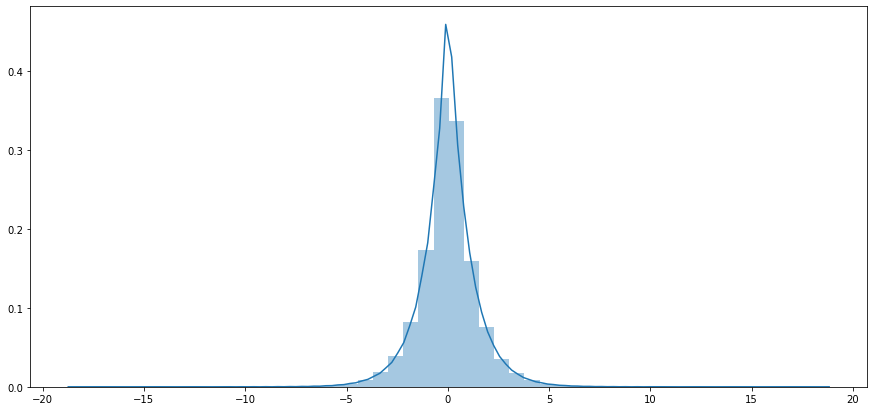

In [4]:
n = 100000000
laplace_sim = rlaplace(n, alpha=1)
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.distplot(laplace_sim)
plt.show()

In [5]:
M = np.sqrt(2.0 / np.pi) * np.exp(.5)
x = np.copy(laplace_sim)
u = np.random.uniform(low=0.0, high=1.0, size=n)

In [6]:
y = x[u < (norm.pdf(x) / (M * cauchy.pdf(x)))]

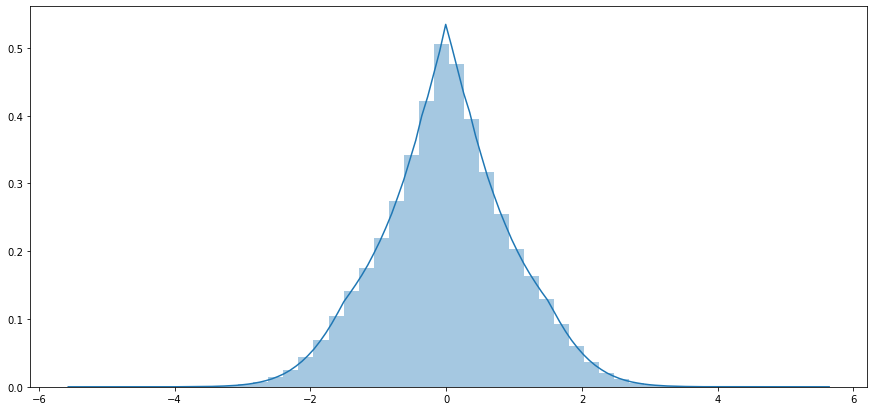

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.distplot(y)
plt.show()

## Cauchy

In [8]:
def cauchy_quantile(u, x0=0, gamma=1):
    cauchy_q = x0 + gamma * np.tan(np.pi * (u - 0.5))
    return cauchy_q

def rcauchy(n, x0=0, gamma=1):
    unif = np.random.uniform(low=0.0, high=1.0, size=n)
    cauchy = cauchy_quantile(unif, x0=x0, gamma=gamma)
    return cauchy

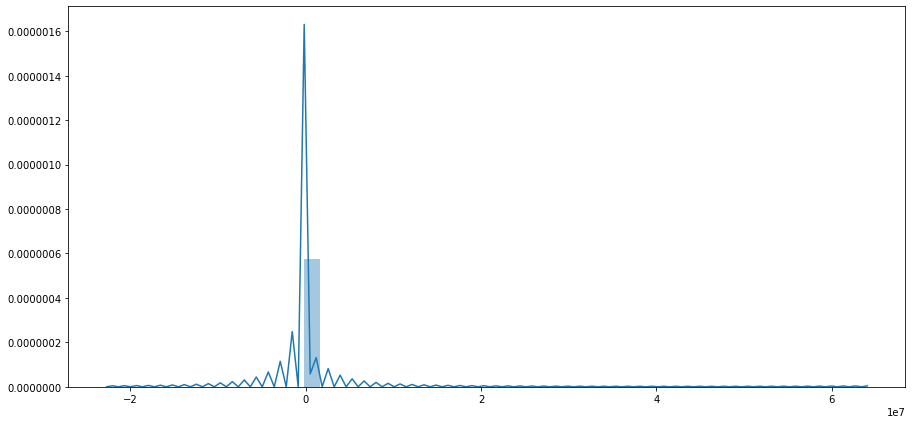

In [9]:
cauchy_sim = rcauchy(n, x0=0, gamma=1)
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.distplot(cauchy_sim)
plt.show()

In [10]:
M = np.sqrt(np.pi / 2.0)
x = np.copy(cauchy_sim)
u = np.random.uniform(low=0.0, high=1.0, size=n)

In [11]:
y = x[u < (norm.pdf(x) / (M * cauchy.pdf(x)))]

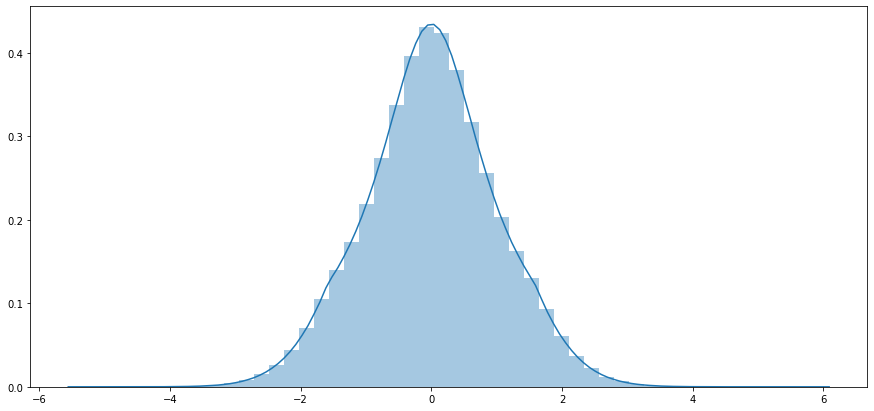

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.distplot(y)
plt.show()